### Global

In [1]:
import os, pandas as pd, glob
from pythainlp.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pythainlp.corpus import thai_stopwords
stopwords = list(thai_stopwords())
import nest_asyncio
nest_asyncio.apply()
import os, pandas as pd, glob
import logging
from csv import writer

def removeFile(file_name):
    if os.path.exists(file_name):
        os.remove(file_name)
    else:
        print("Can not delete the file as it doesn't exists")

def readFile(file_name):
    return pd.read_csv(file_name, sep=',' ,usecols=COL)

print("Global done !")

OUTPUT_FILE = 'data/covid_samut.csv'
OUTPUT_CLEAN_FILE = 'data/covid_samut_clean.csv'
OUTPUT_GRAPH_FILE = 'data/covid_samut_graph.json'
COL = ["id", "username", "date", "time", "place", "tweet", "hashtags"]

Global done !


In [2]:
import twint

# keywords = ['#โควิดกทม', '#ตลาดกลางกุ้ง']
# keywords = ['#โควิดสมุทรสาคร', '#โควิดกรุงเทพ']

def getData(keywords, file_path):
    removeFile(file_path)
    for k in keywords:
        t = twint.Config()
        t.Search = k
        t.Store_csv = True
        t.Show_hashtags = False
        t.Debug = False
        t.Hide_output = True
        t.Output = file_path
        t.Since = "2021-01-01"
        t.Until = "2021-03-01"
        t.Custom["tweet"] = COL
        twint.run.Search(t)
        print('collect tweet data success ! search hashtag ' + k)

getData(['#โควิดสมุทรสาคร', '#ตลาดกลางกุ้ง'], OUTPUT_FILE)
# getData(['#โควิดกทม', '#โควิดกรุงเทพ'], OUTPUT_FILE)

Can not delete the file as it doesn't exists
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
collect tweet data success ! search hashtag #โควิดสมุทรสาคร
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
collect tweet data success ! search hashtag #ตลาดกลางกุ้ง


### Clean

In [3]:
import os, pandas as pdglob
import re

def cleanText(msg):
    # ลบ text ที่อยู่ในวงเล็บ <> ทั้งหมด
    # msg = re.sub(r'<.*?>','', msg)
    # ลบ hashtag
    # msg = re.sub(r'#','',msg)
    # msg = re.sub('.','',msg)

    msg = re.sub(':','',msg)
    msg = re.sub(' :','',msg)
    # msg = re.sub('#','',msg)
    msg = re.sub(r'\(','',msg)
    msg = re.sub(r'\)','',msg)
    msg = re.sub(r'-','',msg)
    msg = re.sub(r'\|','',msg)
    msg = re.sub(r'’','',msg)
    msg = re.sub(r'‘','',msg)
    msg = re.sub(r'!','',msg)
    msg = re.sub(r'\[','',msg)
    msg = re.sub(r'\]','',msg)
    msg = re.sub(r'⏰','',msg)
    msg = re.sub(r'⏬','',msg)
    msg = re.sub(r'/','',msg)
    msg = re.sub(r'"','',msg)
    msg = re.sub(r'“','',msg)
    msg = re.sub(r'”','',msg)
    msg = re.sub(r'–','',msg)
    msg = re.sub(r'@','',msg)
    msg = re.sub(r'^https?:\/\/.*[\r\n]*', '', msg)
    msg = re.sub(r'^http?:\/\/.*[\r\n]*', '', msg)
    msg = re.sub(r'http\S+', '', msg)
    msg = re.sub(r"[a-z]", '', msg)
    msg = re.sub(r"[A-Z]", '', msg)
    msg = re.sub(r"[0-9]", '', msg)
    msg = re.sub(r"[,@\'?\$%_]", '', msg, flags=re.I)

    # remove space
    # msg = re.sub(r"\s+", '', msg, flags=re.I)

    msg = re.sub(r"^\s+", '', msg, flags=re.I)
    msg = re.sub(r"\s+$", '', msg, flags=re.I)
    msg = re.sub(r"\s+[a-zA-Z]\s+", '', msg, flags=re.I)

    # ‍
    msg = re.sub('\u200D', '', msg, flags=re.I)
    msg = re.sub('\u200c', '', msg, flags=re.I)
    msg = re.sub('\u200b', '', msg, flags=re.I)
    msg = re.sub('\n', '', msg, flags=re.I)

    # hashtage
    msg = re.sub(re.compile("\s([@#][\w_-]+)", re.ASCII), '', msg)
    msg = re.sub(re.compile("\s([@#][\W_-]+)", re.ASCII), '', msg)


    emoji_pattern = re.compile(
    "["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251"
    "]+"
    )

    msg = re.sub(emoji_pattern, '', msg)
    msg = ' '.join(msg.split())
    return msg



from ast import literal_eval
def is_interest_sentence(row):
    FILTER_OUT_KEYWORD = ['ขายแบบหนา',
                          'ค่าส่ง',
                          'ชิ้นละ',
                          'กล่องละ',
                          'พร้อมส่ง',
                          'สนใจทัก',
                          'ส่งจริง',
                          'ใครสนทัก',
                          'ใส่สบายไม่อึดอัด',
                          'โปรวันนี้',
                          'พรีออเดอร์',
                          'จะขาย',
                          'ราคา',
                          'รับตัวแทนจำหน่าย',
                          'รับตัวแทน',
                          'จำหน่าย',
                          'ส่งฟรี', 'กล่องต่อไป']
    sentence = row[5]
    hashtags = literal_eval(row[6])
    for f in FILTER_OUT_KEYWORD:
        if f in sentence:
            return False

        for h in hashtags:
            if f in h:
                return False

    return True

def cleanData(file_name, file_name_clean):
    CSV_ENCODING = 'utf-8-sig'

    df=pd.read_csv(file_name)

    tweet_set = set()
    clean_text_list = list()
    for i, row in df.iterrows():
        clean_tweet = cleanText(row[5])
        clean_text_strip = clean_tweet.strip()
        if clean_text_strip != '' and len(clean_text_strip) >= 25 and (clean_tweet not in tweet_set) and is_interest_sentence(row):
            tweet_set.add(clean_tweet)
            clean_text_list.append([row[0],row[1],row[2],row[3],row[4],clean_tweet,row[6]])

    df_clean = pd.DataFrame(clean_text_list, columns=COL)
    df_clean.to_csv(file_name_clean, encoding=CSV_ENCODING, index=False)
    print('clean text done !')

cleanData(OUTPUT_FILE, OUTPUT_CLEAN_FILE)
# cleanData(OUTPUT_SAMUT_FILE)

clean text done !


### WordCloud

In [ ]:
!pip install PyICU

source_file = OUTPUT_CLEAN_FILE
df=pd.read_csv(source_file)

text = ''
texts = set()
for i, row in df.iterrows():
    tweet = row[5]
    if tweet not in texts:
        texts.add(tweet)
        text = text + ' '.join(word_tokenize(tweet,engine='icu',keep_whitespace=True))

wordcloud = WordCloud(
    font_path='font/THSarabunNew.ttf',
    stopwords = ' '.join(stopwords),
    regexp=r"[\u0E00-\u0E7Fa-zA-Z']+",
    background_color = 'white',
    max_words = 200,
    max_font_size = 40,
    scale = 3,
    random_state = 42
).generate(text)
# fig = plt.figure(1, figsize = (15, 15))
#     plt.axis('off')
#     if title:
#         fig.suptitle(title, fontsize = 20)
#         fig.subplots_adjust(top = 2.3)
# plt.imshow(wordcloud)
# plt.show()
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()


### Hashtag

No. of hashtags used in 1655 tweets is 8800
Shape of df_hashtag is: (8800, 1)
Top  15  Hashtags
                hashtags  counts
766       โควิดสมุทรสาคร    1613
715              โควิด19    1045
758          โควิดวันนี้     653
714                โควิด     577
724         โควิดกรุงเทพ     421
28               covid19     337
30              covid_19     214
764     โควิดสมุทรปราการ     185
498  สถานการณ์ควิดวันนี้     167
519            สมุทรสาคร     159
515          สมองลายพราง     139
646               เราชนะ     114
752           โควิดระยอง     112
223    ดีเจมะตูมติดโควิด     105
137             กาละแมร์     104


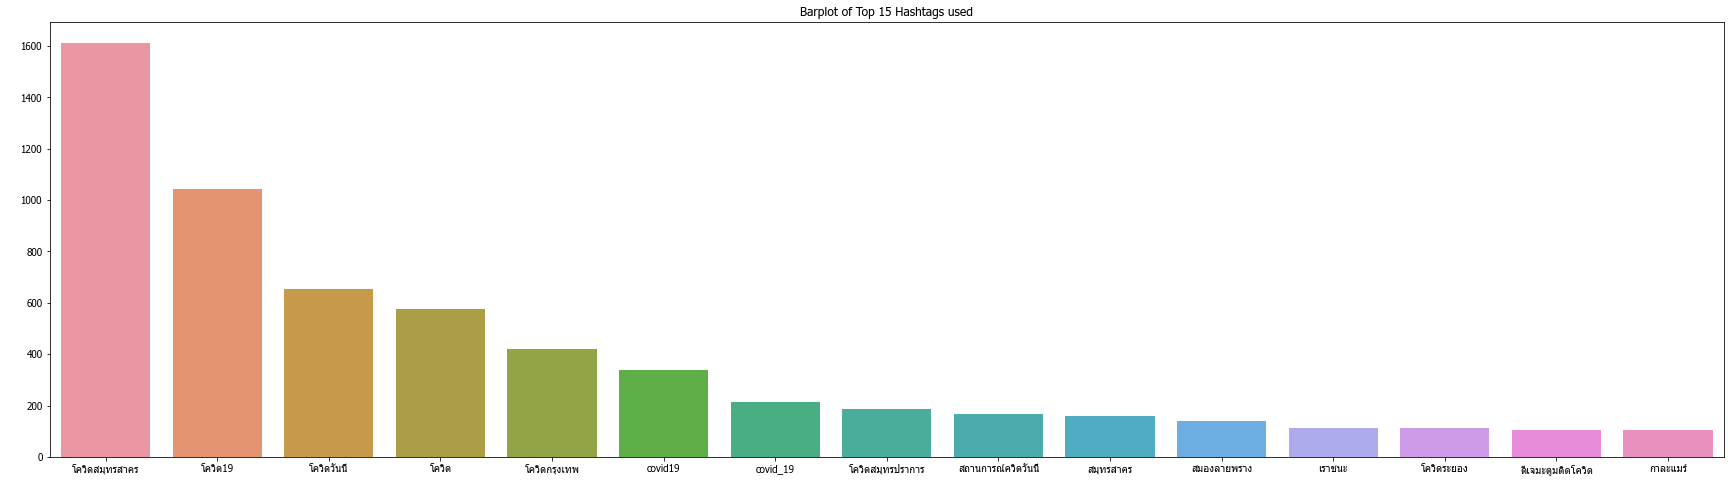

In [4]:
import json
from ast import literal_eval
import seaborn as sns

source_file = OUTPUT_CLEAN_FILE
df=pd.read_csv(source_file)

data_list = df.values
data = list(map(lambda s: s[0] ,data_list))

data = df
data['hashtags'] = data['hashtags'].apply(literal_eval)

hashtag_list = []
for i in range(0, len(data)):
    # Obtain the current list of hashtags
    curr_hashtag = data.iloc[i, :]['hashtags']

    # Extract and append the hashtags to 'hashtag_list':
    for j in range(0, len(curr_hashtag)):
        hashtag_list.append(curr_hashtag[j])

# No. of hashtags
print('No. of hashtags used in {} tweets is {}'.format(len(data), len(hashtag_list)))

df_hashtag = pd.DataFrame(
    {'hashtags': hashtag_list}
)
# print(df_hashtag.head(10))
print('Shape of df_hashtag is:', df_hashtag.shape)


# Define N to be the top number of hashtags
N = 15
print('Top ',N,' Hashtags')
top_hashtags = df_hashtag.groupby(['hashtags']).size().reset_index(name = 'counts').sort_values(by = 'counts', ascending = False).head(N)
print(top_hashtags)
# seaborn countplot on the top N hashtags
plt.rcParams['font.family'] = 'tahoma'
plt.figure(figsize=(30,8))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'hashtags', y = 'counts', data = top_hashtags)
plt.title('Barplot of Top ' + str(N) + ' Hashtags used')
plt.xlabel('Hashtags', color = 'white', fontname='Tahoma')
plt.ylabel('Frequency', color = 'white', fontname='Tahoma')
plt.show()


### Prepare Graph

In [5]:
import json
from datetime import date
from dateutil.rrule import rrule, DAILY

pre_a = date(2020, 12, 31)
a = date(2021, 1, 1)
b = date(2021, 2, 28)

df=readFile(OUTPUT_CLEAN_FILE)
data = []
for dt in rrule(DAILY, dtstart=pre_a, until=b):

    dt_date = dt.strftime("%Y-%m-%d")
    search_result = df.loc[df['date'] == dt_date]
    tweet_count = len(search_result)
    if dt.date() == pre_a:
        data.append({
            'date': dt_date,
            'tweet_count': 1
        })
    elif dt.date() < a:
        data.append({
            'date': dt_date,
            'tweet_count': 0
        })
    else:
        data.append({
            'date': dt_date,
            'tweet_count': tweet_count
        })

with open(OUTPUT_GRAPH_FILE, 'w') as outfile:
    json.dump(data, outfile)
print('saved file success')


saved file success


### Show Graph

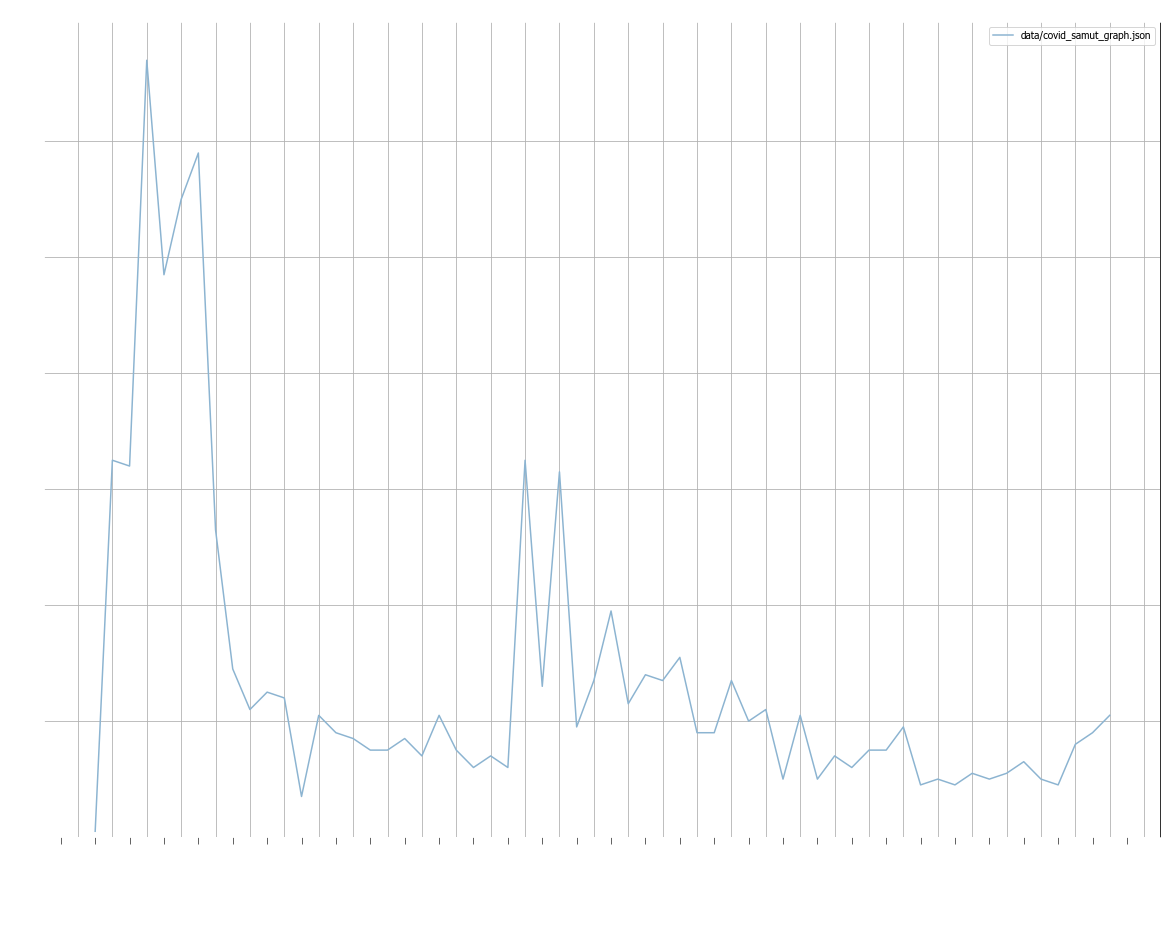

In [6]:
import datetime as dt
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np

def plot_graph(file_names, title_name, h_size=5, w_size = 20, y_internal_rage = 1):
    listofdf = []

    y_min_val = 0
    y_max_val = 0
    for file_name in file_names:
        f = open(file_name)
        histprices = json.load(f)
        for i in histprices:
            y_max_val = i['tweet_count'] if i['tweet_count'] > y_max_val else y_max_val
            i['date'] = dt.datetime.strptime(i['date'], '%Y-%m-%d').date()


        #Parse the API response and select only last 600 days of prices
        # histprices = histprices[-20:]
        graph_df = pd.DataFrame.from_dict(histprices)
        graph_df = graph_df.rename({'tweet_count': file_name}, axis=1)
        listofdf.append(graph_df)

    #set index of each DataFrame by common column before concatinatinghtem
    dfs = [df.set_index('date') for df in listofdf]
    histpriceconcat = pd.concat(dfs,axis=1)
    # prepare the figure
    fig, ax = plt.subplots(figsize = (w_size, h_size))
    # specify the position of the major ticks at the beginning of the week
    # ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))
    ax.xaxis.set_major_locator(md.DayLocator(interval=2))
    # specify the format of the labels as 'year-month-day'
    ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
    # specify the position of the minor ticks at each day
    ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))
    # set ticks length
    ax.tick_params(axis = 'x', which = 'major', length = 12)
    ax.tick_params(axis = 'x', which = 'minor', length = 7)

    # ax.set_ylim(0)

    #divide all dataframe by first line of data to enable comparison
    histpriceconcat = histpriceconcat/histpriceconcat.iloc[0]

    for i, col in enumerate(histpriceconcat.columns):
        histpriceconcat[col].plot()

    # min value of y axis
    ax.set_ylim(0)

    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')


    plt.yticks(np.arange(y_min_val, y_max_val, y_internal_rage))

    title_obj = plt.title('Tweet count Comparison [' + title_name +']')
    plt.setp(title_obj, color='white')         #set the color of title to red

    plt.grid(True)
    # (optional) rotate by 90° the labels in order to improve their spacing
    plt.setp(ax.xaxis.get_majorticklabels(), rotation = 70)
    # set axes labels
    plt.xlabel('Date')
    plt.ylabel('Tweet Count')
    # plt.xticks(rotation=300)
    plt.legend(histpriceconcat.columns)
    # plt.rcParams["figure.figsize"] = (20,8)
    # show the plot
    plt.show()


plot_graph([OUTPUT_GRAPH_FILE], 'Covid19 Tweet Count', 15, 20, 20)